In [1]:
%config Completer.use_jedi = False

# **Basic Exploratory Data Analysis on a Hotel Reservations dataset**

* #### In this basic course project, we'll implement everything we learned on Platzi's Python: Análisis Exploratorio de Datos.
* #### **Data Exploration**.
* #### **Data Visualization**.
* #### **Data Analysis**.
* #### **Conclusions.**.

### **Installing libraries**

!pip install --upgrade pip


!pip install numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1


### **Importing libraries**

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

### **About dataset:**

#### **Context**:

#### The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

#### **Can we predict if the customer is going to honor the reservation or cancel it?**

### **General plots appereance**

In [3]:
%matplotlib inline
sns.set(style='darkgrid', palette='bright', font_scale=1)
plt.rcParams['figure.figsize'] = (5.5, 7)
plt.style.use('fast')

reserv_status = {
    'Canceled': '#b40404',
    'Not_Canceled': '#04b505'
}

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

### **Getting to know our dataset**

In [5]:
hotel_reserv_raw = pd.read_csv('Hotel Reservations.csv')
hotel_reserv_raw

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
hotel_reserv_raw.shape

(36275, 19)

In [7]:
hotel_reserv_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
hotel_reserv_raw.dtypes.value_counts()

int64      13
object      5
float64     1
dtype: int64

#### **After having the first encounter with out dataset, we can confirm there are:**
* **14 numerical variables**
* **5 categorical variables**

### **Data dictionary:**

* **`Booking_ID`: unique identifier of each booking**
* **`no_of_adults`: Number of adults**
* **`no_of_children`: Number of Children**
* **`no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel**
* **`no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel**
* **`type_of_meal_plan`: Type of meal plan booked by the customer.**
* **`required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)**
* **`room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.**
* **`lead_time`: Number of days between the date of booking and the arrival date**
* **`arrival_year`: Year of arrival date**
* **`arrival_month`: Month of arrival date**
* **`arrival_date`: Date of the month**
* **`market_segment_type`: Market segment designation.**
* **`repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)**
* **`no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking**
* **`no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking**
* **`avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)**
* **`no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)**
* **`booking_status`: Flag indicating if the booking was canceled or not.**

In [9]:
# Checking for null values..

hotel_reserv_raw.isnull()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Checking for null values..

hotel_reserv_raw.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

#### **We can confirm there are no null values within out dataset**

### **Knowing our dataset's statistics**

In [11]:
# Numerical variables statistics

hotel_reserv_raw.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [12]:
# Categorical variables statistics

hotel_reserv_raw.describe(include=object)

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


## **Hypothesis:**

* #### **Average no. of adults and children. Most commom.**
* #### **Average. no. of week days and weekend days. Most commom.**
* #### **Parking space necessary? if it is, what's the reason?**
* #### **Which meal plan is the most commom?**
* #### **Which room type?**
* #### **Lead time? Which month? Which year? day?**
* #### **Market segment type?**
* #### **Does the historical or previous cancellations matters?**
* #### **Average price per room? Most expensive, cheaper, avg?**
* #### **Relations. Does this variable impacts the other one?**
* #### **Single variable, bi-variables, multivariables analysis**
* #### **Conclusions**

#### **No. of adults and children**

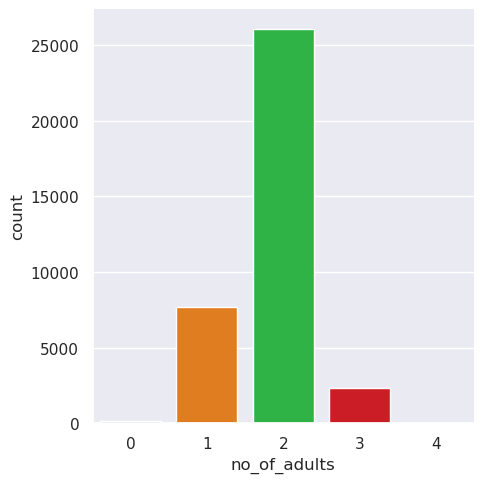

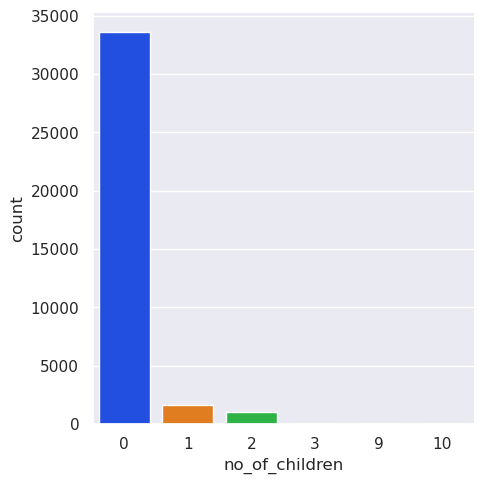

In [22]:
sns.catplot(
    data=hotel_reserv_raw,
    x='no_of_adults',
    kind='count'
)

sns.catplot(
    data=hotel_reserv_raw,
    x='no_of_children',
    kind='count'
);

#### **As we can see, for the adults, couples or 2 adults are the most commom. Followed by single adults.**

#### **For the children, instead, the most commom is 0 children. That meants, as per this dataset, the most common thing is that the rooms are booked without any children. Then, by a huge difference, we've 1 child or 2 children.**



In [14]:
# No. of adults, exact count.

hotel_reserv_raw.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [15]:
# No. of children, exact count.

hotel_reserv_raw.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

#### **Weekends nights and Weeknights**

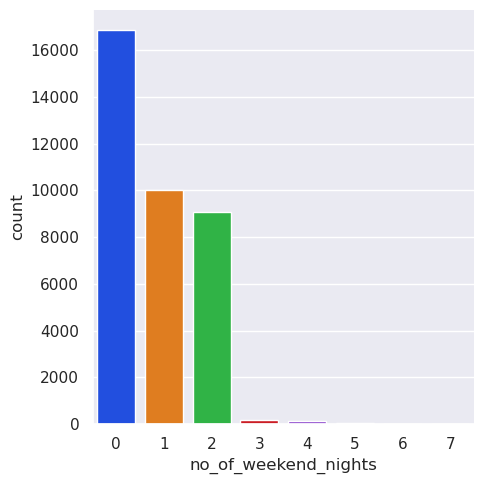

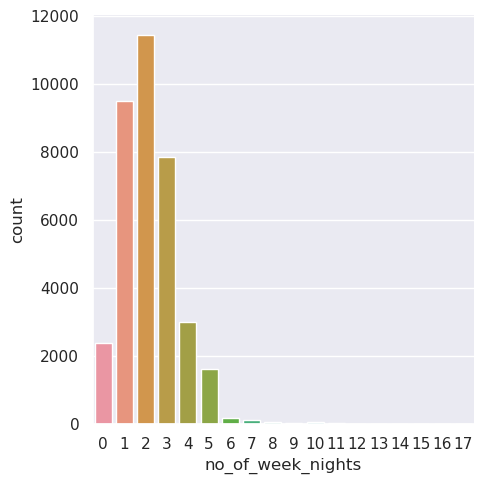

In [16]:
sns.catplot(
    data=hotel_reserv_raw,
    x='no_of_weekend_nights',
    kind='count'
)

sns.catplot(
    data=hotel_reserv_raw,
    x='no_of_week_nights',
    kind='count'
);

#### **Parking space**

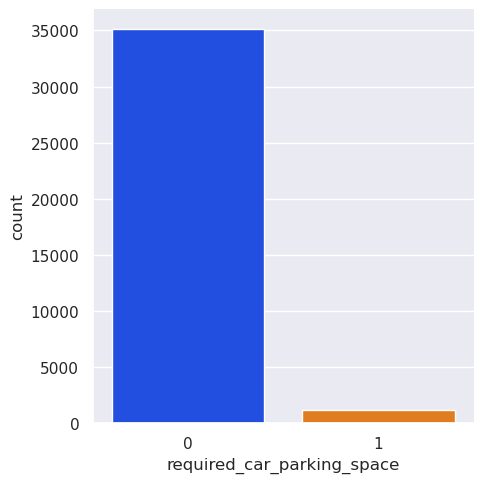

In [17]:
sns.catplot(
    data=hotel_reserv_raw,
    x='required_car_parking_space',
    kind='count'
);

In [18]:
# Required car parking space exact count

(
    hotel_reserv_raw
    .required_car_parking_space
    .value_counts()
)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

#### **Regarding if the car's parking space is neccesary; it's quite clear it is not necessary.**

#### **Room and Meal types**

In [27]:
(
    hotel_reserv_raw
    .type_of_meal_plan
    .value_counts()
)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [29]:
(
    hotel_reserv_raw
    .room_type_reserved
    .value_counts()
)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

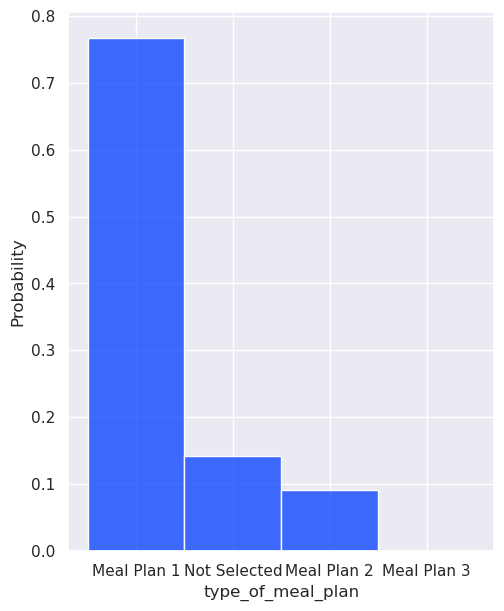

In [36]:
sns.histplot(
    data=hotel_reserv_raw,
    x='type_of_meal_plan',
    binwidth=1,
    stat='probability'
);

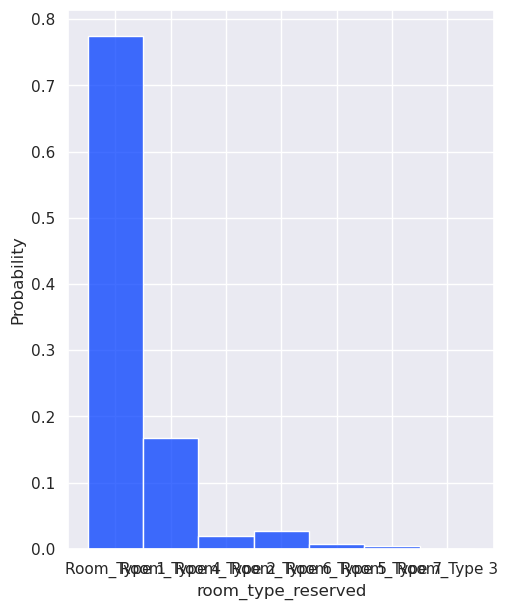

In [35]:
sns.histplot(
    data=hotel_reserv_raw,
    x="room_type_reserved",
    binwidth=1,
    stat='probability'
);

In [37]:
# PMF on meal plan.

empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.type_of_meal_plan
)

,probs
Meal Plan 1,0.767333
Meal Plan 2,0.091110
Meal Plan 3,0.000138
Not Selected,0.141420


In [38]:
# PMF on room types.

empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.room_type_reserved
)

,probs
Room_Type 1,0.775465
Room_Type 2,0.019076
Room_Type 3,0.000193
Room_Type 4,0.166975
Room_Type 5,0.007305
Room_Type 6,0.026630
Room_Type 7,0.004356


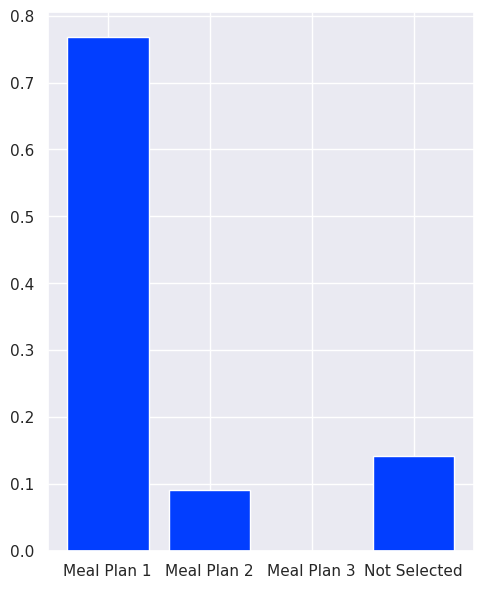

In [39]:
# PMF meal plan column within a variable to use plot method.

pmf_meal_plan = empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.type_of_meal_plan
)
pmf_meal_plan.bar()

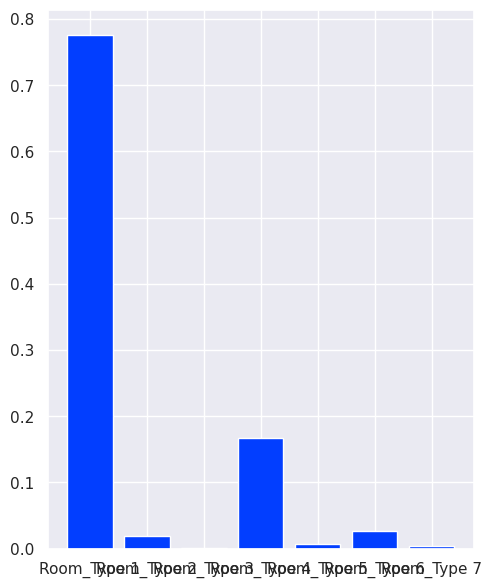

In [42]:
# PMF room types column within a variable to use plot method.

pmf_room_types = empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.room_type_reserved
)
pmf_room_types.bar()

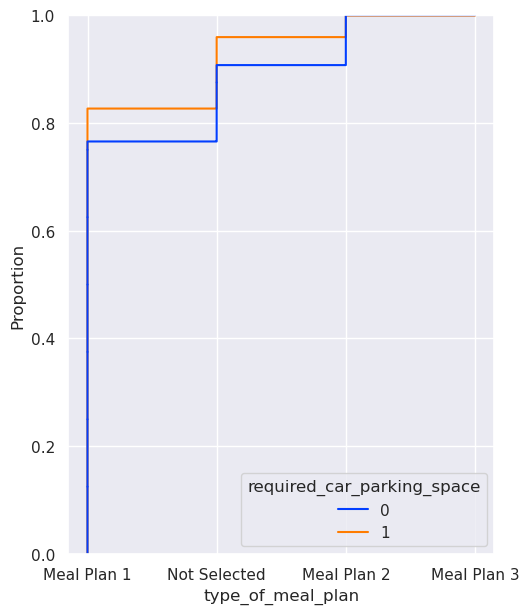

In [44]:
# ECDF

sns.ecdfplot(
    data=hotel_reserv_raw,
    x="type_of_meal_plan",
    hue="required_car_parking_space"
);

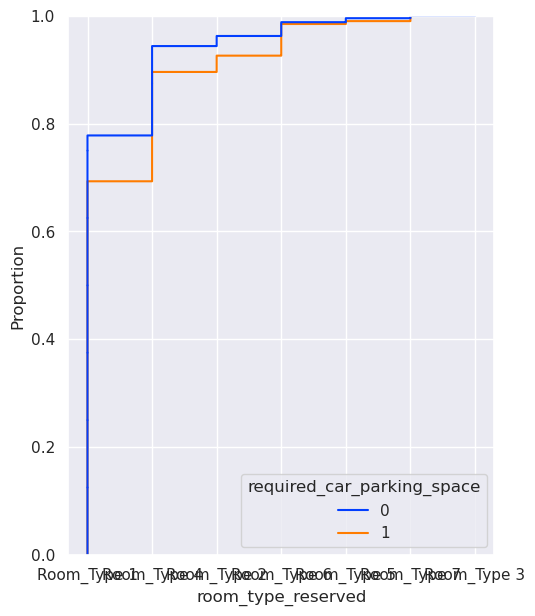

In [45]:
sns.ecdfplot(
    data=hotel_reserv_raw,
    x="room_type_reserved",
    hue="required_car_parking_space"
);

In [48]:
# ECDF through empiricaldist..

cdf_meal_plan = empiricaldist.Cdf.from_seq(
    hotel_reserv_raw.type_of_meal_plan,
    normalize=True
)
cdf_meal_plan

,probs
Meal Plan 1,0.767333
Meal Plan 2,0.858442
Meal Plan 3,0.858580
Not Selected,1.000000


In [49]:
# ECDF through empiricaldist..

cdf_room_type = empiricaldist.Cdf.from_seq(
    hotel_reserv_raw.room_type_reserved,
    normalize=True
)
cdf_room_type

,probs
Room_Type 1,0.775465
Room_Type 2,0.794542
Room_Type 3,0.794735
Room_Type 4,0.961709
Room_Type 5,0.969014
Room_Type 6,0.995644
Room_Type 7,1.000000


### **Lead time? Which month? Which year? day?**

In [54]:
#lead_time 

arrival_month arrival_date

(
    hotel_reserv_raw
    .lead_time
    .value_counts()
)

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

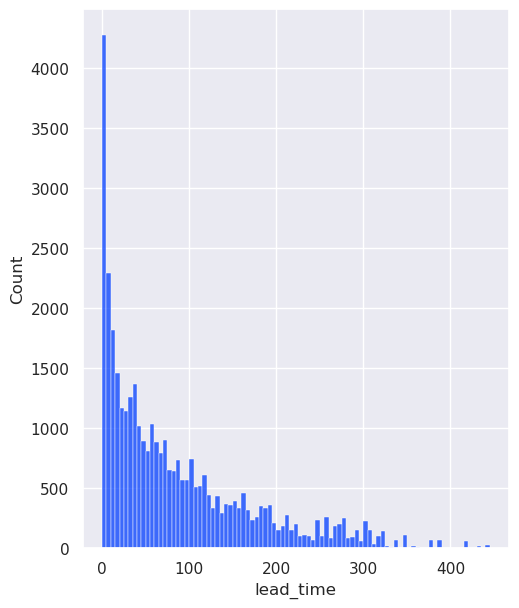

In [58]:
# lead_time

sns.histplot(
    data=hotel_reserv_raw,
    x='lead_time',
    binwidth=5
);

In [59]:
# arrival_year

(
    hotel_reserv_raw
    .arrival_year
    .value_counts()
)

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [69]:
# PMF on lead_time

pmf_lead_time = empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.lead_time
)

pmf_lead_time

,probs
0,0.035755
1,0.029717
2,0.017726
3,0.017367
4,0.017312
...,...
381,0.000055
386,0.001902
418,0.001654
433,0.000551


In [72]:
# PMF on arrival_year

pmf_arrival_year = empiricaldist.Pmf.from_seq(
    hotel_reserv_raw.arrival_year
)

pmf_arrival_year

,probs
2017,0.179573
2018,0.820427


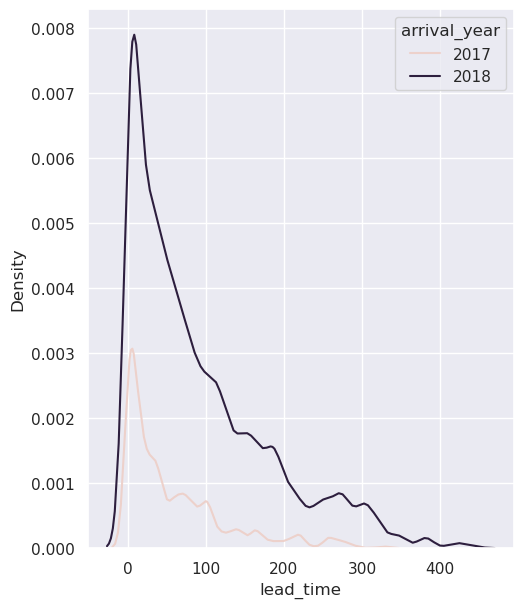

In [75]:
# Density Probability Function on lead time..

sns.kdeplot(
    data=hotel_reserv_raw,
    x='lead_time',
    bw_method=0.1,
    hue="arrival_year"
);

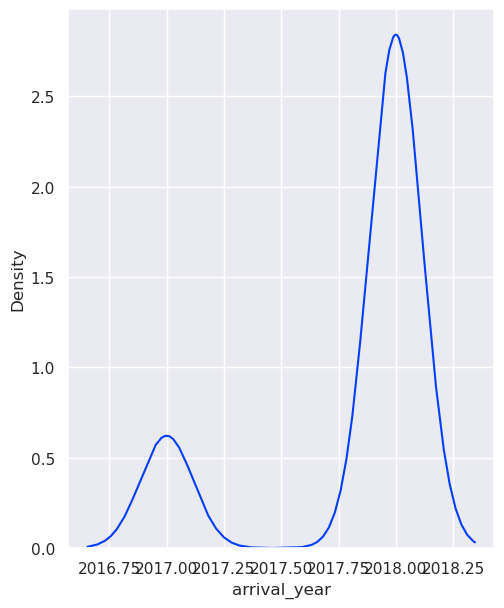

In [79]:
sns.kdeplot(
    data=hotel_reserv_raw,
    x='arrival_year',
    bw_method=.3,
);

In [80]:
# lead_time statistics..

lead_time_stats = hotel_reserv_raw.lead_time.describe()
lead_time_stats

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

In [81]:
# lead_time array, min to max..

xs = np.linspace(lead_time_stats['min'], lead_time_stats['max'])
xs

array([  0.        ,   9.04081633,  18.08163265,  27.12244898,
        36.16326531,  45.20408163,  54.24489796,  63.28571429,
        72.32653061,  81.36734694,  90.40816327,  99.44897959,
       108.48979592, 117.53061224, 126.57142857, 135.6122449 ,
       144.65306122, 153.69387755, 162.73469388, 171.7755102 ,
       180.81632653, 189.85714286, 198.89795918, 207.93877551,
       216.97959184, 226.02040816, 235.06122449, 244.10204082,
       253.14285714, 262.18367347, 271.2244898 , 280.26530612,
       289.30612245, 298.34693878, 307.3877551 , 316.42857143,
       325.46938776, 334.51020408, 343.55102041, 352.59183673,
       361.63265306, 370.67346939, 379.71428571, 388.75510204,
       397.79591837, 406.83673469, 415.87755102, 424.91836735,
       433.95918367, 443.        ])

In [83]:
ys = scipy.stats.norm(lead_time_stats['mean'], lead_time_stats['std']).cdf(xs)
ys

array([0.16062946, 0.18762998, 0.21726795, 0.24944321, 0.2839888 ,
       0.32067142, 0.35919487, 0.39920658, 0.440307  , 0.48206143,
       0.52401374, 0.56570129, 0.60667017, 0.64648994, 0.68476718,
       0.72115698, 0.75537191, 0.78718817, 0.81644851, 0.84306231,
       0.86700272, 0.88830143, 0.90704154, 0.92334907, 0.93738371,
       0.94932941, 0.95938526, 0.96775715, 0.97465041, 0.98026378,
       0.98478463, 0.98838554, 0.99122217, 0.99343216, 0.995135  ,
       0.99643264, 0.99741063, 0.9981396 , 0.99867698, 0.99906877,
       0.99935127, 0.99955273, 0.99969481, 0.99979392, 0.99986229,
       0.99990893, 0.99994041, 0.99996141, 0.99997528, 0.99998433])

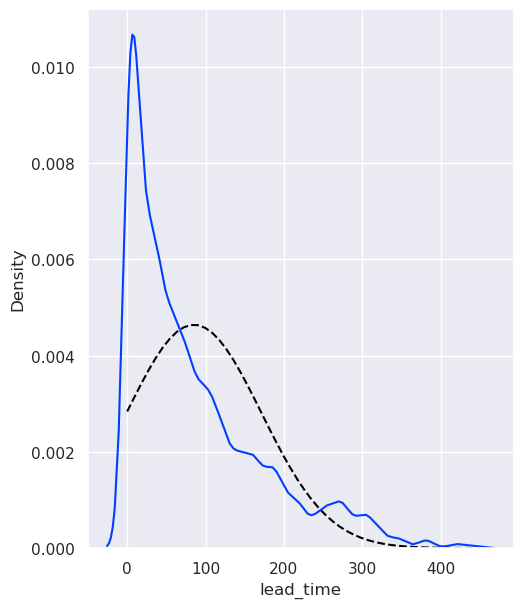

In [91]:
# Probability Density Function
xs = np.linspace(lead_time_stats['min'], lead_time_stats['max'])
ys = scipy.stats.norm(lead_time_stats['mean'], lead_time_stats['std']).pdf(xs)

# Hypotethical normal distribution
plt.plot(xs, ys, color='black', linestyle='dashed')

# Real distribution
sns.kdeplot(
    data=hotel_reserv_raw,
    x='lead_time',
    bw_method=0.1
);

In [93]:
# arrival_month

(
    hotel_reserv_raw
    .arrival_month
    .value_counts()
)

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

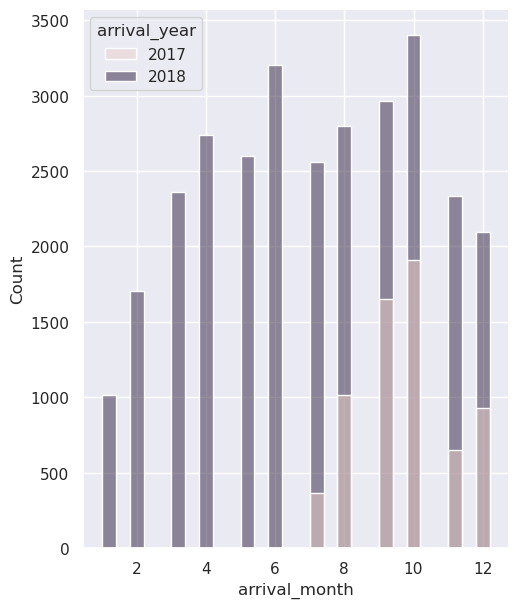

In [98]:
sns.histplot(
    data=hotel_reserv_raw,
    x="arrival_month",
    binwidth=.4,
    hue="arrival_year"
);

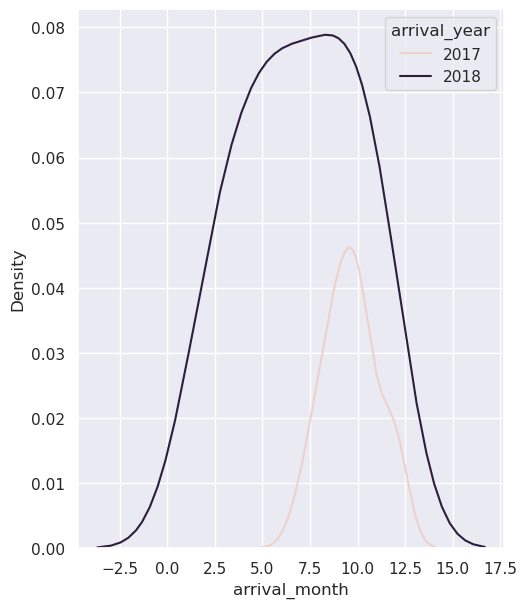

In [121]:
# Density Probability Function on arrival month..

sns.kdeplot(
    data=hotel_reserv_raw,
    x='arrival_month',
    bw_method=.5,
    hue="arrival_year"
);

In [101]:
arrival_month_stats = hotel_reserv_raw.arrival_month.describe()
arrival_month_stats

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

In [102]:
# arrival_month array, min to max..

xs = np.linspace(arrival_month_stats['min'], arrival_month_stats['max'])
xs

array([ 1.        ,  1.2244898 ,  1.44897959,  1.67346939,  1.89795918,
        2.12244898,  2.34693878,  2.57142857,  2.79591837,  3.02040816,
        3.24489796,  3.46938776,  3.69387755,  3.91836735,  4.14285714,
        4.36734694,  4.59183673,  4.81632653,  5.04081633,  5.26530612,
        5.48979592,  5.71428571,  5.93877551,  6.16326531,  6.3877551 ,
        6.6122449 ,  6.83673469,  7.06122449,  7.28571429,  7.51020408,
        7.73469388,  7.95918367,  8.18367347,  8.40816327,  8.63265306,
        8.85714286,  9.08163265,  9.30612245,  9.53061224,  9.75510204,
        9.97959184, 10.20408163, 10.42857143, 10.65306122, 10.87755102,
       11.10204082, 11.32653061, 11.55102041, 11.7755102 , 12.        ])

In [108]:
ys = scipy.stats.norm(arrival_month_stats['mean'], arrival_month_stats['std']).pdf(xs)
ys

array([0.01455544, 0.01691676, 0.01955631, 0.02248714, 0.0257193 ,
       0.02925916, 0.03310869, 0.03726489, 0.04171914, 0.04645671,
       0.05145638, 0.05669015, 0.06212317, 0.06771382, 0.07341395,
       0.07916943, 0.0849208 , 0.09060419, 0.09615239, 0.10149614,
       0.1065655 , 0.11129134, 0.11560689, 0.11944933, 0.12276127,
       0.12549217, 0.12759966, 0.12905061, 0.12982198, 0.12990146,
       0.12928777, 0.12799073, 0.12603096, 0.12343933, 0.12025622,
       0.11653038, 0.11231775, 0.10768005, 0.10268329, 0.09739618,
       0.09188861, 0.08623014, 0.08048856, 0.0747286 , 0.06901081,
       0.06339063, 0.05791761, 0.05263491, 0.04757894, 0.04277925])

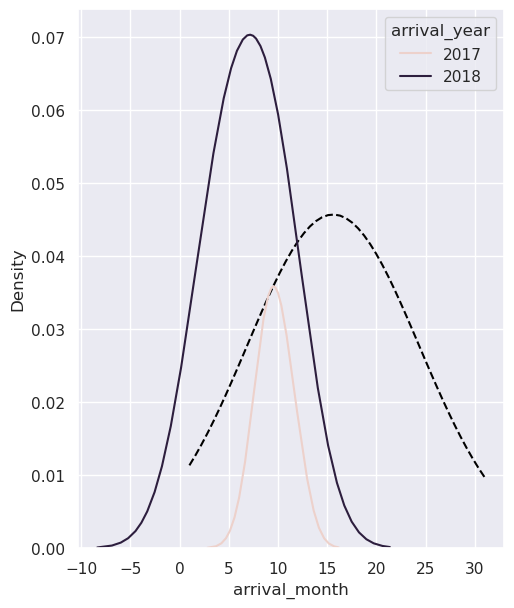

In [131]:
# Hypotethical normal distribution
plt.plot(xs, ys, color='black', linestyle='dashed')

# Real distribution
sns.kdeplot(
    data=hotel_reserv_raw,
    x='arrival_month',
    bw_method=1,
    hue="arrival_year"
);

In [114]:
# arrival_date

(
    hotel_reserv_raw
    .arrival_date
    .value_counts()
)

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

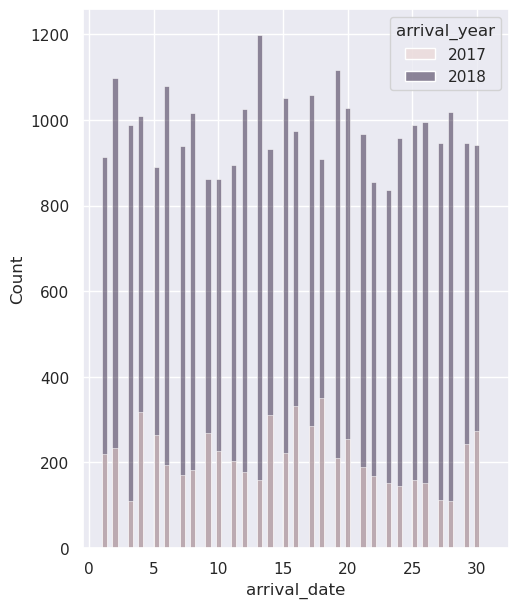

In [119]:
sns.histplot(
    data=hotel_reserv_raw,
    x="arrival_date",
    binwidth=.4,
    hue="arrival_year"
);

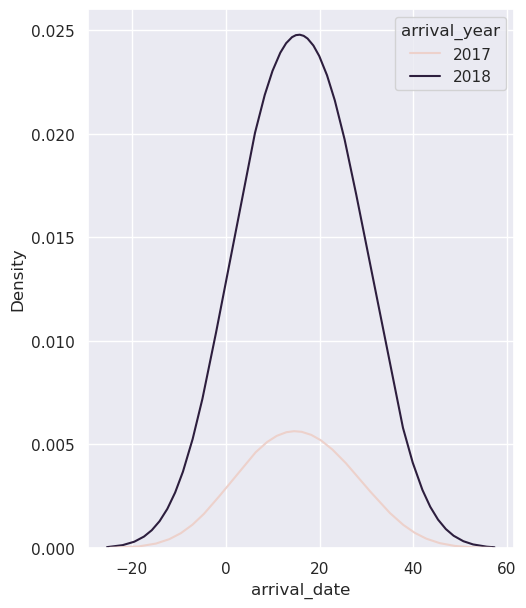

In [138]:
# Density Probability Function on arrival date..

sns.kdeplot(
    data=hotel_reserv_raw,
    x='arrival_date',
    bw_method=1,
    hue="arrival_year"
);

In [123]:
arrival_date_stats = hotel_reserv_raw.arrival_date.describe()
arrival_date_stats

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64

In [124]:
# arrival_date array, min to max..

xs = np.linspace(arrival_date_stats['min'], arrival_date_stats['max'])
xs

array([ 1.        ,  1.6122449 ,  2.2244898 ,  2.83673469,  3.44897959,
        4.06122449,  4.67346939,  5.28571429,  5.89795918,  6.51020408,
        7.12244898,  7.73469388,  8.34693878,  8.95918367,  9.57142857,
       10.18367347, 10.79591837, 11.40816327, 12.02040816, 12.63265306,
       13.24489796, 13.85714286, 14.46938776, 15.08163265, 15.69387755,
       16.30612245, 16.91836735, 17.53061224, 18.14285714, 18.75510204,
       19.36734694, 19.97959184, 20.59183673, 21.20408163, 21.81632653,
       22.42857143, 23.04081633, 23.65306122, 24.26530612, 24.87755102,
       25.48979592, 26.10204082, 26.71428571, 27.32653061, 27.93877551,
       28.55102041, 29.16326531, 29.7755102 , 30.3877551 , 31.        ])

In [125]:
ys = scipy.stats.norm(arrival_date_stats['mean'], arrival_date_stats['std']).pdf(xs)
ys

array([0.01131716, 0.01269044, 0.01416072, 0.01572399, 0.01737439,
       0.01910404, 0.02090307, 0.02275957, 0.02465966, 0.0265876 ,
       0.02852596, 0.03045583, 0.03235712, 0.03420883, 0.03598949,
       0.03767751, 0.03925164, 0.04069139, 0.04197748, 0.04309225,
       0.04402011, 0.04474785, 0.04526497, 0.04556396, 0.04564043,
       0.04549326, 0.04512461, 0.04453987, 0.04374753, 0.04275897,
       0.04158818, 0.04025147, 0.03876704, 0.0371546 , 0.03543494,
       0.03362945, 0.03175975, 0.02984718, 0.0279125 , 0.02597545,
       0.02405452, 0.02216661, 0.02032689, 0.01854862, 0.01684308,
       0.0152195 , 0.01368512, 0.01224519, 0.01090314, 0.00966066])

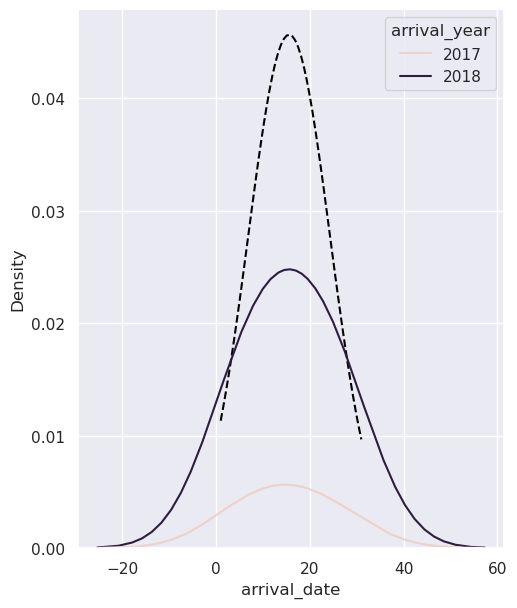

In [130]:
# Hypotethical normal distribution
plt.plot(xs, ys, color='black', linestyle='dashed')

# Real distribution
sns.kdeplot(
    data=hotel_reserv_raw,
    x='arrival_date',
    bw_method=1,
    hue="arrival_year"
);

In [132]:
# market_segment_type

(
    hotel_reserv_raw
    .market_segment_type
    .value_counts()
)

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

#### **Let's use the type of market in order to segment our previous single variable studies.**
#### **For instance, which type of room Corporate rents? or regular people through Online reservations?**

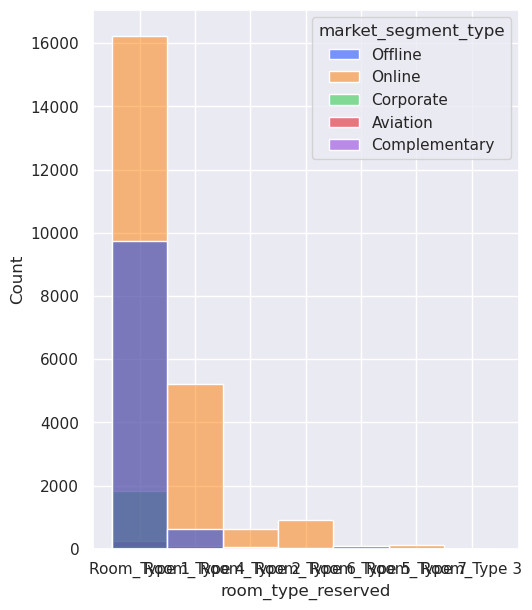

In [152]:
# Types of rooms based on the market segment

sns.histplot(
    data=hotel_reserv_raw,
    x='room_type_reserved',
    binwidth=1,
    hue="market_segment_type",
);

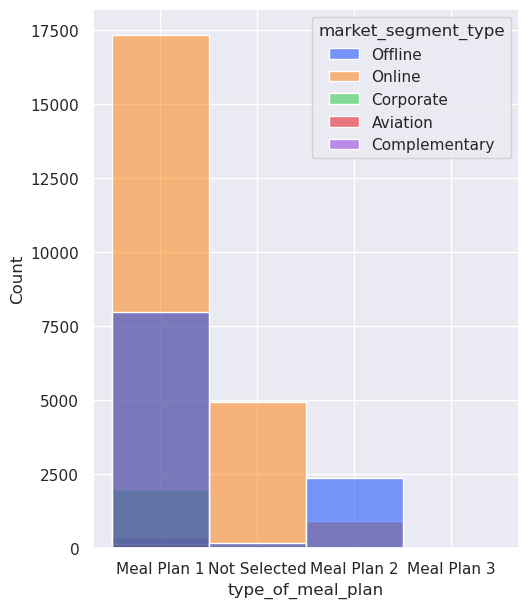

In [154]:
# Types of meal plans based on the market segment

sns.histplot(
    data=hotel_reserv_raw,
    x='type_of_meal_plan',
    binwidth=.3,
    hue="market_segment_type",
);

In [155]:
# repeated_guest ---> 0: No, 1: Yes

(
    hotel_reserv_raw
    .repeated_guest
    .value_counts()
)

0    35345
1      930
Name: repeated_guest, dtype: int64

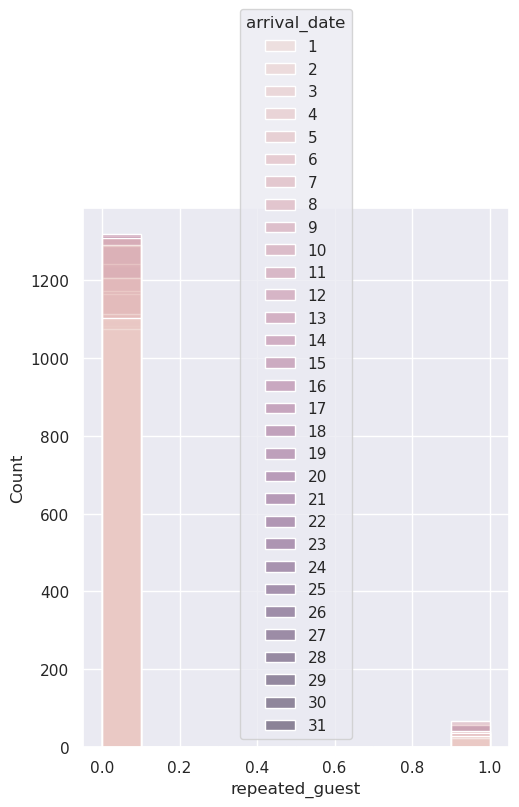

In [162]:
sns.histplot(
    data=hotel_reserv_raw,
    x='repeated_guest',
    hue="arrival_date",
    binwidth=.1
);